Computed L values: [0.03029208 0.06965516 0.14812903 0.24566    0.37452707 0.54169195
 0.81445768 1.1894881  1.83597352 3.20235211 4.90324719]
length of data.X_obs.t_obs: (1235,)


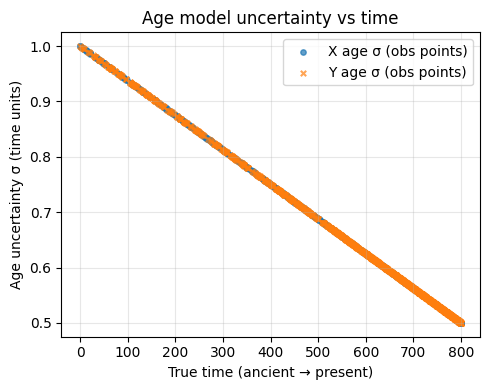

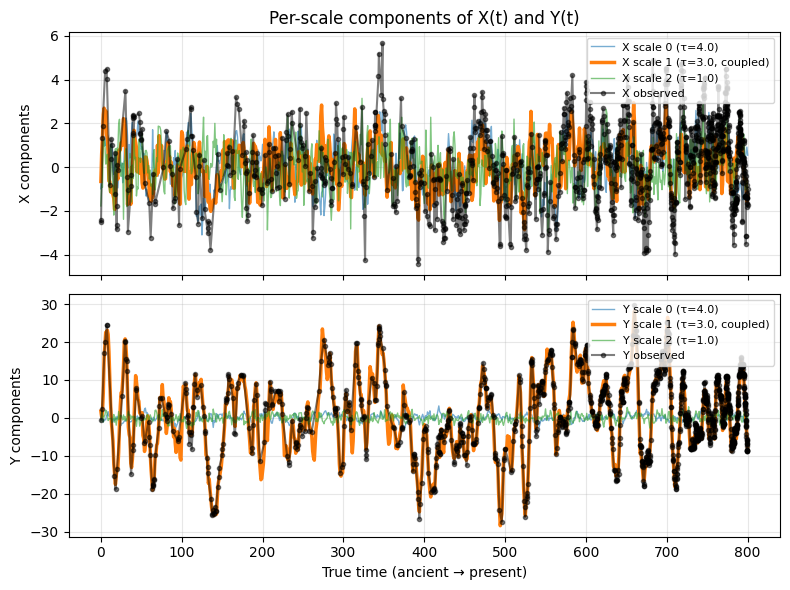

In [1]:
from MISTE import miste_core as mc

from MISTE import syn_data as sd

import numpy as np

import importlib
importlib.reload(sd)
importlib.reload(mc)

# 1) Generate synthetic data
data = sd.generate_miste_synthetic_data(
    t_min=0.0,
    t_max=800.0,
    dt_true=0.1,
    tau_scales=(4, 3, 1.0),
    coupled_scale_index=1,
    coupling_strength=0.5,
    gap_old=2.0,
    gap_young=0.1,
    n_ensembles=100,
    random_state=123,
    sigma_old=1.0,
    sigma_young=0.5,
    if_plot=True,
)

L_values=mc.compute_gap_scales(data.X_obs.t_obs, data.Y_obs.t_obs, quantiles=(0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95))
print("Computed L values:", L_values)


print("length of data.X_obs.t_obs:", np.shape(data.X_obs.t_obs))

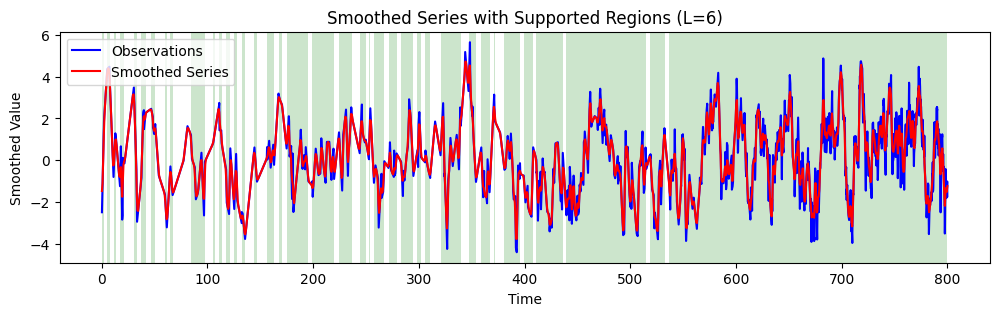

length of smoothed: (1334,)
[-1.47117589 -1.10571738  0.06342191 ... -1.32642056 -1.51525556
 -1.23809721]


In [2]:
from MISTE import miste_core as mc

from MISTE import syn_data as sd

import importlib
importlib.reload(sd)
importlib.reload(mc)


L=6

# grid =np.arange(np.min(data.X_obs.t_obs), np.max(data.X_obs.t_obs), L/2)

t_smoothed, v_smoothed=mc.smooth_gaussian_irregular(
    t_obs=data.X_obs.t_obs,
    v_obs=data.X_obs.values_obs,
    L=L,
    if_plot_smoothed=True,
    )



# # plot the original and smoothed data
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20, 5))
# plt.plot(data.X_obs.t_obs, data.X_obs.values_obs, 'b-', label='Original Data', alpha=0.5)
# plt.plot(t, Smoothed, 'r-', label='Smoothed Data', linewidth=2)
# plt.xlabel('Time')
# plt.ylabel('Values')
# plt.legend()
# # set xlim to 700 to 800
# plt.xlim(700, 800)
# plt.title('Gaussian Smoothing on Irregular Data')
# plt.show()


# import matplotlib.pyplot as plt
# plt.figure(figsize=(20, 5))
# plt.plot(data.X_obs.t_obs, data.X_obs.values_obs, 'b-', label='Original Data', alpha=0.5)
# plt.plot(t, Smoothed, 'r-', label='Smoothed Data', linewidth=2)
# plt.xlabel('Time')
# plt.ylabel('Values')
# plt.legend()
# plt.title('Gaussian Smoothing on Irregular Data')
# plt.show()


print("length of smoothed:", v_smoothed.shape)
print(v_smoothed)

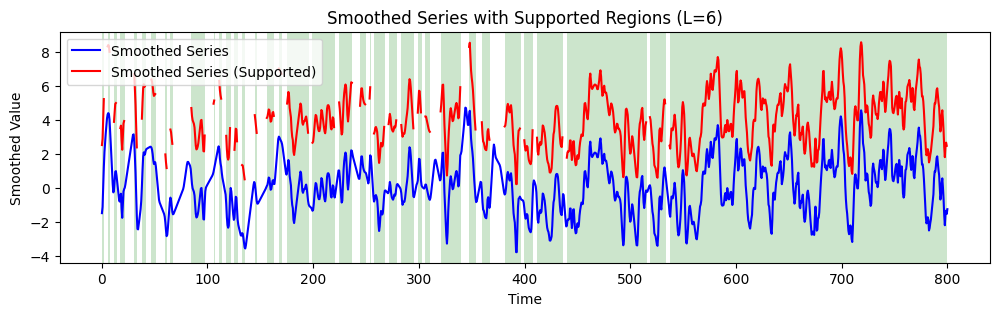

[ True  True  True ...  True  True False]
Supported shape:
(1334,)
sum of supported: 1002


In [3]:
from MISTE import miste_core as mc

from MISTE import syn_data as sd

import importlib
importlib.reload(sd)
importlib.reload(mc)

import numpy as np

L=6

# grid=np.arange(np.min(data.X_obs.t_obs), np.max(data.X_obs.t_obs), L/2)

supported = mc.support_mask_from_gaps(
    t_obs=data.X_obs.t_obs,
    t_smoothed= t_smoothed,
    v_smoothed=v_smoothed,
    L=L,
    if_plot_supported=True
    )

print(supported)
print("Supported shape:")
print(supported.shape)
print("sum of supported:", np.sum(supported))
# print(Smoothed[supported].shape)

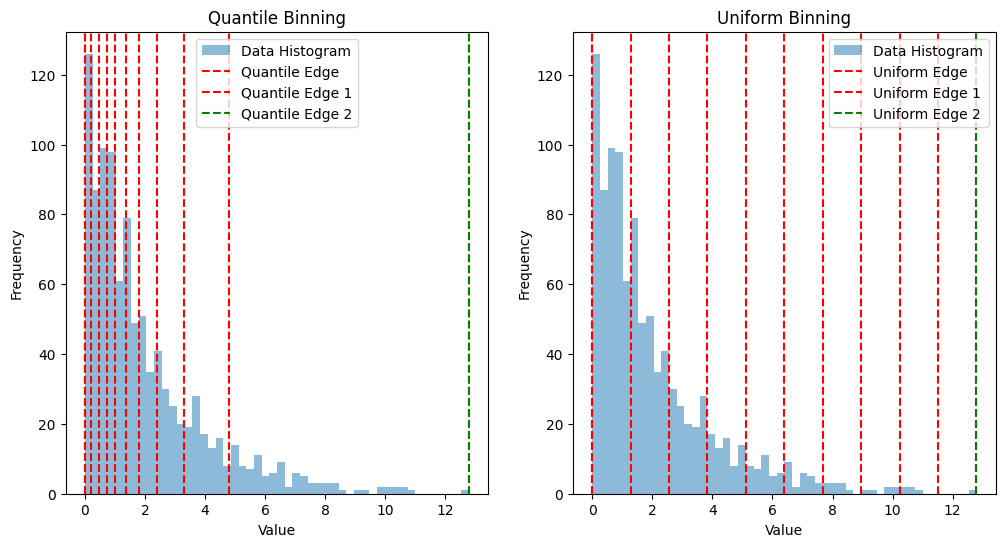

In [69]:
# create a skewed distribution then called ms._bin_edges_1d(values: np.ndarray, n_bins: int, method: str = "quantile") -> np.ndarray, use method =quantile and uniform respectively, the function return the edges of the bin. plot the returned bin edges of the two methods respectively
import MISTE.miste_core as mc
import importlib
importlib.reload(mc)
import numpy as np
import matplotlib.pyplot as plt

test_data=np.random.exponential(scale=2.0, size=1000)
edges_quantile = mc._bin_edges_1d(test_data, n_bins=10, method="quantile")
edges_uniform = mc._bin_edges_1d(test_data, n_bins=10, method="uniform")

# plot data in 1 by 2 plot side by side, each plot the his with nbins =50, them plot the two bin edges returned from the function as verticle lines
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(test_data, bins=50, alpha=0.5, label='Data Histogram')
# loop through edges_quantile and plot each edge as a vertical line
for edge in edges_quantile:
    plt.axvline(edge, color='r', linestyle='--', label='Quantile Edge' if edge == edges_quantile[0] else "")
plt.axvline(edges_quantile[0], color='r', linestyle='--', label='Quantile Edge 1')
plt.axvline(edges_quantile[-1], color='g', linestyle='--', label='Quantile Edge 2')
plt.title('Quantile Binning')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()    

plt.subplot(1, 2, 2)
plt.hist(test_data, bins=50, alpha=0.5, label='Data Histogram')
# loop through edges_uniform and plot each edge as a vertical line
for edge in edges_uniform:
    plt.axvline(edge, color='r', linestyle='--', label='Uniform Edge' if edge == edges_uniform[0] else "")
plt.axvline(edges_uniform[0], color='r', linestyle='--', label='Uniform Edge 1')
plt.axvline(edges_uniform[-1], color='g', linestyle='--', label='Uniform Edge 2')
plt.title('Uniform Binning')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

In [59]:
# generate two time series to test the function:  
'''def binned_te_lag1(
    Y_future: np.ndarray,
    Y_past: np.ndarray,
    X_past: np.ndarray,
    n_bins_x: int = 6,
    n_bins_y: int = 6,
    n_bins_y_future: Optional[int] = None,
    binning: str = "quantile",
    alpha: float = 1.0,
    min_samples: int = 50,
) -> float:
'''

import MISTE.miste_core as mc
import importlib
importlib.reload(mc)
import numpy as np
import matplotlib.pyplot as plt

# generate two time series
np.random.seed(42)
n_points = 10000
time = np.arange(n_points)
X = np.sin(0.02 * time) + 0.5 * np.random.randn(n_points)
Y = np.cos(0.02 * time) + 0.5 * np.random.randn(n_points)
# create lagged versions
X_past = X[:-1]
Y_past = Y[:-1]
Y_future = Y[1:]    
# compute binned TE lag1
te_lag1 = mc.binned_te_lag1(
    Y_future=Y_future,
    Y_past=Y_past,
    X_past=X_past,
    n_bins_x=6,
    n_bins_y=6)

print("Binned TE Lag 1:", te_lag1)

# called the following function to compute Gaussian TE at lag 1
'''
def gaussian_te_lag1(
    Y_future: np.ndarray,
    Y_past: np.ndarray,
    X_past: np.ndarray,
) -> float:'''

te_lag1_gaussian = mc.gaussian_te_lag1(
    Y_future=Y_future,
    Y_past=Y_past,
    X_past=X_past,
)   
print("Gaussian TE Lag 1:", te_lag1_gaussian)

Binned TE Lag 1: 0.03582202797766857
Gaussian TE Lag 1: 0.00027181140833293713


In [36]:
support_xy=np.array([True, True, False, True, True, True, False, False, True])
valid_idx = np.where(support_xy[:-1] & support_xy[1:])[0]

print("Valid indices:", valid_idx)

Valid indices: [0 3 4]


0.08080177076348341
0.07930804531260569


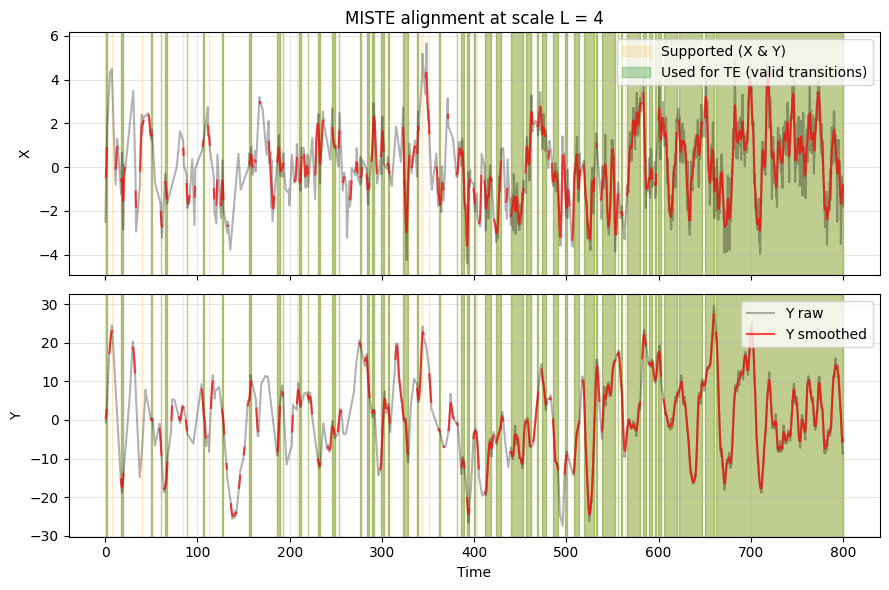

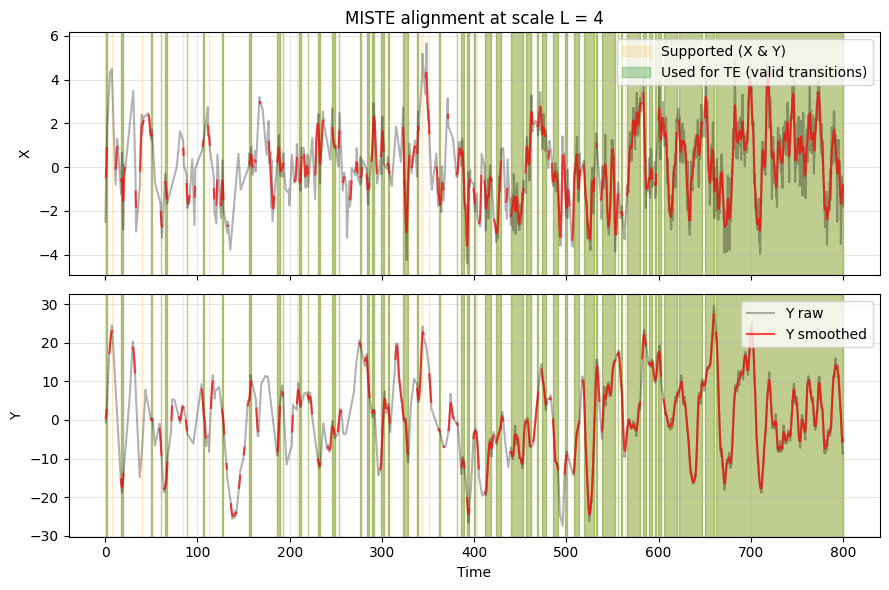

In [4]:
from MISTE import miste_core as mc


from MISTE import syn_data as sd

import importlib
importlib.reload(sd)
importlib.reload(mc)


te_L=mc.compute_miste_single_scale(data.X_obs.t_obs, data.X_obs.values_obs, 
                              data.Y_obs.t_obs, data.Y_obs.values_obs, 
                              L=4, te_method='binned',
                               if_plot_alignment=True )

print(te_L)


te_L=mc.compute_miste_single_scale(data.X_obs.t_obs, data.X_obs.values_obs, 
                              data.Y_obs.t_obs, data.Y_obs.values_obs, 
                              L=4, te_method='gaussian',
                               if_plot_alignment=True )

print(te_L)

Observed TE: 0.08080177076348341
Surrogate TE mean: 0.04864808072768541
Surrogate TE std: 0.008425636397192881
p-value: 0.009900990099009901


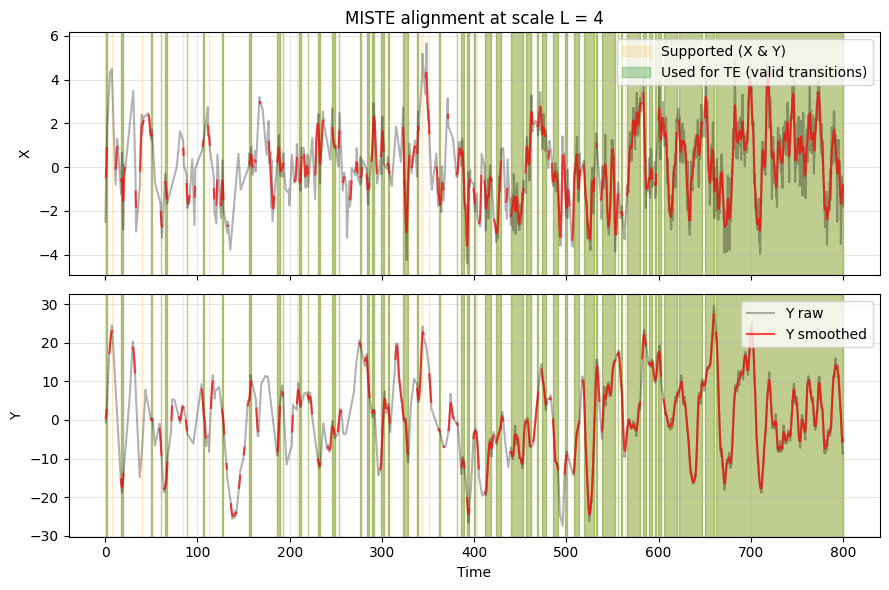

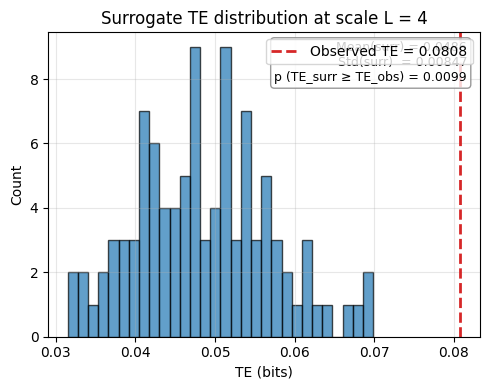

In [5]:
from MISTE import miste_core as mc


from MISTE import syn_data as sd

import importlib
importlib.reload(sd)
importlib.reload(mc)

# call this function:
'''def compute_miste_single_scale_with_surrogates(
    t_x: np.ndarray,
    x_vals: np.ndarray,
    t_y: np.ndarray,
    y_vals: np.ndarray,
    L: float,
    grid_step_factor: float = 0.5,
    window_half_width_factor: float = 0.5,
    sigma_factor: float = 1/3,
    min_valid_data_length: int = 30,
    te_method: str = "binned",  # "binned" or "gaussian"
    n_surrogates: int = 199,
    surrogate_mode: str = "shuffle_xpast",  # currently only this mode
    if_plot_alignment: bool = False,
    te_kwargs: Optional[dict] = None,
    random_state: Optional[int] = None,
):'''


TE_obs, TE_surr, p_value = mc.compute_miste_single_scale_with_surrogates(
    t_x=data.X_obs.t_obs,
    x_vals=data.X_obs.values_obs,
    t_y=data.Y_obs.t_obs,
    y_vals=data.Y_obs.values_obs,
    L=4,
    te_method='binned',
    n_surrogates=100,
    if_plot_alignment=True,
    if_plot_surrogates=True

)

# print results:
print("Observed TE:", TE_obs)
print("Surrogate TE mean:", np.mean(TE_surr))
print("Surrogate TE std:", np.std(TE_surr))
print("p-value:", p_value)



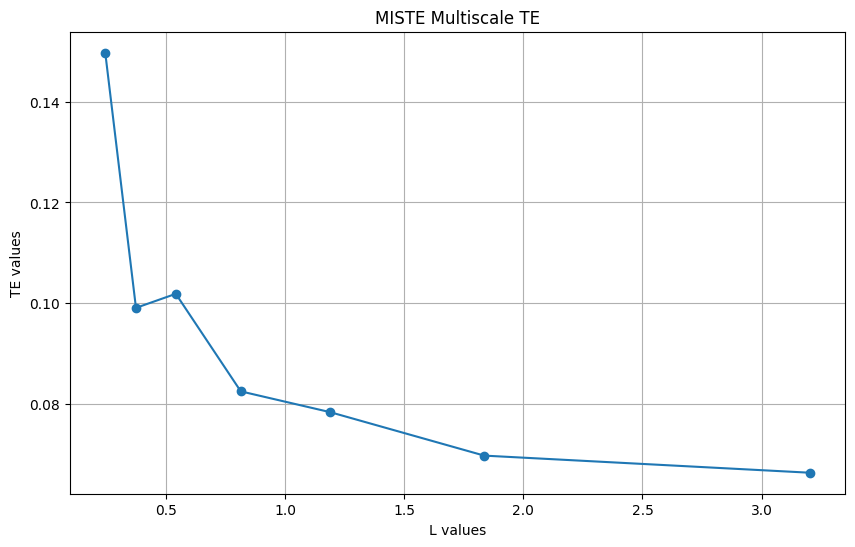

In [7]:
'''call function def compute_miste_multiscale(
    t_x: np.ndarray,
    x_vals: np.ndarray,
    t_y: np.ndarray,
    y_vals: np.ndarray,
    quantiles: Sequence[float] = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9),
    **single_scale_kwargs,
) -> Tuple[np.ndarray, np.ndarray]:'''

L_values,TE_values=mc.compute_miste_multiscale(
    t_x=data.X_obs.t_obs,
    x_vals=data.X_obs.values_obs,
    t_y=data.Y_obs.t_obs,
    y_vals=data.Y_obs.values_obs,
    quantiles=(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9),
    te_method='binned',
    if_plot_alignment=False
)

# plot L_values vs TE_values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(L_values, TE_values, marker='o')
plt.xlabel('L values')
plt.ylabel('TE values')
plt.title('MISTE Multiscale TE')
plt.grid()
plt.show()

[[       nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan        nan        nan
         nan        nan        nan        nan   

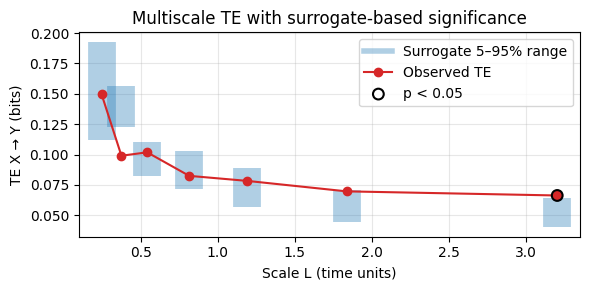

In [8]:
from MISTE import miste_core as mc


from MISTE import syn_data as sd

import importlib
importlib.reload(sd)
importlib.reload(mc)



L_vals, TE_obs, TE_surr_all, p_vals = mc.compute_miste_multiscale_with_surrogates(
    t_x=data.X_obs.t_obs,
    x_vals=data.X_obs.values_obs,
    t_y=data.Y_obs.t_obs,
    y_vals=data.Y_obs.values_obs,
    quantiles=(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9),
    te_method="binned",
    grid_step_factor=0.5,
    min_valid_data_length=30,
    n_surrogates=100,
    random_state=123,
    if_plot_surrogates=True
)

print(TE_surr_all)

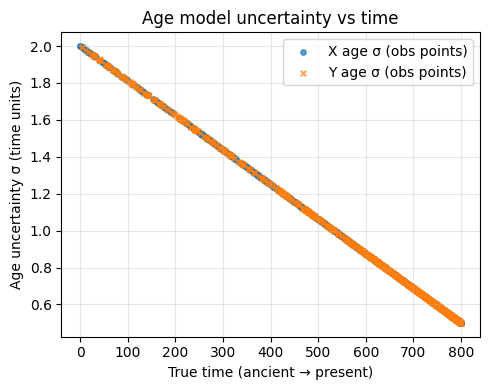

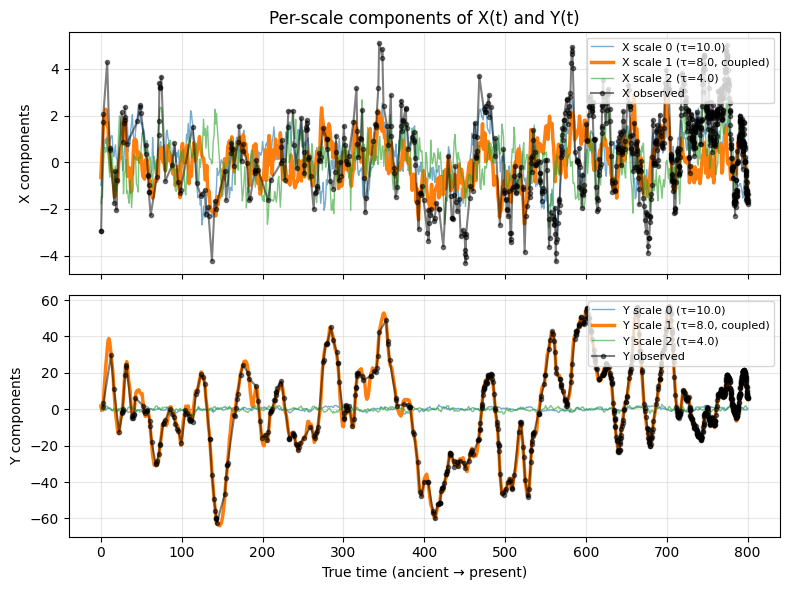

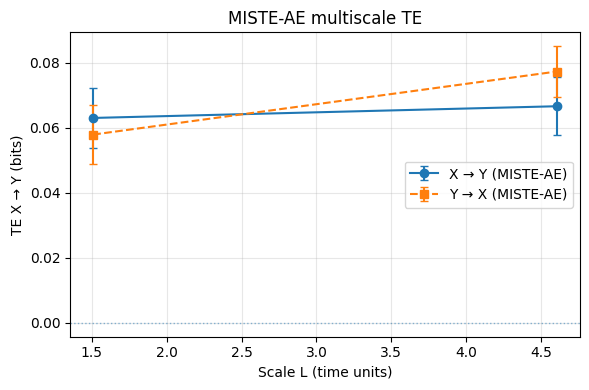

Scales L: [0.07635217 0.29256526 0.69370883 1.50871897 4.60574981]
TE X→Y (mean±std): [(np.float64(nan), np.float64(nan)), (np.float64(nan), np.float64(nan)), (np.float64(nan), np.float64(nan)), (np.float64(0.06299707474412271), np.float64(0.009263030991682027)), (np.float64(0.06659544357696587), np.float64(0.008983753702879644))]
TE Y→X (mean±std): [(np.float64(nan), np.float64(nan)), (np.float64(nan), np.float64(nan)), (np.float64(nan), np.float64(nan)), (np.float64(0.05788681987930528), np.float64(0.00914811991212436)), (np.float64(0.07727200226888097), np.float64(0.007788688386048422))]


In [12]:
from MISTE import syn_data as sd
from MISTE import miste_core as mc

import importlib
import numpy as np
import matplotlib.pyplot as plt

# Reload in case you are iterating on the code
importlib.reload(sd)
importlib.reload(mc)

# ------------------------------------------------------------
# 1. Generate synthetic data
# ------------------------------------------------------------
# data = sd.generate_miste_synthetic_data(
#     t_min=0.0,
#     t_max=800.0,
#     dt_true=0.1,
#     tau_scales=(10.0, 8, 4),
#     coupled_scale_index=1,
#     coupling_strength=0.3,
#     n_ensembles=100,
#     random_state=42,
#     if_plot=False,
# )

data = sd.generate_miste_synthetic_data(
    t_min=0.0,
    t_max=800.0,
    dt_true=0.1,
    tau_scales=(10.0, 8.0, 4),
    coupled_scale_index=1,
    coupling_strength=0.5,
    gap_old=3.0,
    gap_young=0.1,
    n_ensembles=50,
    random_state=123,
    sigma_old=2.0,
    sigma_young=0.5,
    if_plot=True,
)

X_obs = data.X_obs
Y_obs = data.Y_obs

# ------------------------------------------------------------
# 2. Run MISTE-AE: X -> Y
# ------------------------------------------------------------
L_values_xy, TE_mean_xy, TE_std_xy, TE_all_xy = mc.compute_miste_multiscale_ae(
    X_obs,
    Y_obs,
    quantiles=(0.1, 0.3, 0.5, 0.7, 0.9),
    te_method="binned",
    grid_step_factor=0.5,
    min_valid_data_length=30,
    te_kwargs=dict(
        n_bins_x=6,
        n_bins_y=6,
        binning="quantile",
        alpha=1.0,
        min_samples=50,
    ),
)

# ------------------------------------------------------------
# 3. Run MISTE-AE: Y -> X (for comparison)
# ------------------------------------------------------------
L_values_yx, TE_mean_yx, TE_std_yx, TE_all_yx = mc.compute_miste_multiscale_ae(
    Y_obs,
    X_obs,
    quantiles=(0.1, 0.3, 0.5, 0.7, 0.9),
    te_method="binned",
    grid_step_factor=0.5,
    min_valid_data_length=30,
    te_kwargs=dict(
        n_bins_x=6,
        n_bins_y=6,
        binning="quantile",
        alpha=1.0,
        min_samples=50,
    ),
)

# L_values_xy and L_values_yx should be identical (same gap distribution),
# but we’ll just use L_values_xy as the common x-axis.
L_vals = L_values_xy

# ------------------------------------------------------------
# 4. Plot: TE(L) with error bars for both directions
# ------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 4))

# X -> Y
mc.plot_miste_multiscale(
    L_vals,
    TE_mean_xy,
    TE_std_xy,
    ax=ax,
    label="X → Y (MISTE-AE)",
    xscale_log=False,
)

# Y -> X (overlay, no new figure)
ax.errorbar(
    L_vals,
    TE_mean_yx,
    yerr=TE_std_yx,
    fmt="s--",
    capsize=3,
    label="Y → X (MISTE-AE)",
)

# Optional: annotate the “true” coupled scale (tau) from the synthetic generator
true_tau = data.tau_scales[data.coupled_scale_index]
ax.axhline(0, linestyle=":", linewidth=1, alpha=0.5)
ax.set_title("MISTE-AE multiscale TE")
ax.legend()
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 5. (Optional) quick sanity printout
# ------------------------------------------------------------
print("Scales L:", L_vals)
print("TE X→Y (mean±std):", list(zip(TE_mean_xy, TE_std_xy)))
print("TE Y→X (mean±std):", list(zip(TE_mean_yx, TE_std_yx)))


In [143]:
m = 0  # pick an ensemble
L_test = L_vals[2]

te_single = mc.compute_miste_single_scale(
    t_x=X_obs.age_ensembles[m],
    x_vals=X_obs.values_obs,
    t_y=Y_obs.age_ensembles[m],
    y_vals=Y_obs.values_obs,
    L=L_test,
    te_method="binned",
    if_plot_alignment=True,
    te_kwargs=dict(n_bins_x=6, n_bins_y=6, binning="quantile"),
)

print("Single-ensemble TE at L =", L_test, ":", te_single)


Single-ensemble TE at L = 0.8850339448074465 : nan


/Users/pz/VScode/MISTE/miste_core.py:457: RuntimeWarning: Mean of empty slice
  TE_mean = np.nanmean(TE_all, axis=0)
/opt/anaconda3/envs/pz_py311_causal_x86/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


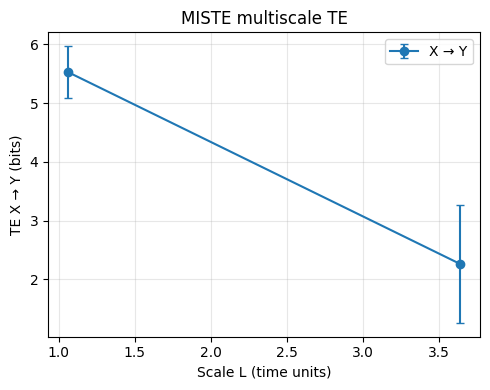

In [6]:
from syn_data import generate_miste_synthetic_data
from miste_core import compute_miste_multiscale_ae, plot_miste_multiscale
import matplotlib.pyplot as plt

# 1) Generate synthetic data
data = generate_miste_synthetic_data(
    t_min=0.0,
    t_max=800.0,
    dt_true=0.1,
    tau_scales=(10.0, 1.0, 0.1),
    coupled_scale_index=1,
    coupling_strength=0.5,
    gap_old=5.0,
    gap_young=0.1,
    n_ensembles=50,
    random_state=123,
    if_plot=False,
)

# 2) Compute multiscale TE with age ensembles (MISTE-AE)
L_vals, TE_mean, TE_std, TE_all = compute_miste_multiscale_ae(
    data.X_obs,
    data.Y_obs,
    quantiles=(0.1, 0.3, 0.5, 0.7, 0.9),
    grid_step_factor=1.0,
    s_factor_x=0.5,
    s_factor_y=0.5,
    min_valid_transitions=30,
)

# 3) Plot TE(L) with error bars
fig, ax = plot_miste_multiscale(L_vals, TE_mean, TE_std)
plt.show()
